In [349]:
import requests
import pandas as pd
import json
import math
import time
import matplotlib.pyplot as plt

In [350]:
# 그래프 그릴 때 필수 속성 (한글과 마이너스 폰트 깨짐 방지)
# 폰트설정
plt.rc("font", family='Malgun Gothic')

# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

In [351]:
url = 'https://apis.data.go.kr/1160100/service/GetStockSecuritiesInfoService/getStockPriceInfo'

In [352]:
params = {
    "serviceKey" : "GjOuV44hgVtQSgSphSIxH8wQ16f2Oi0VbOHNe+7T71+vSiyt5GmPnwB/ZiUfntBSaI4qY38pj9Eue09omH8c9A==",
    "numOfRows" : 1000,
    "pageNo" : 1,
    "resultType" : "json",
    "itmsNm" : "LG화학",
    "beginBasDt" : "20200101",
    "endBasDt" : "20241231"
}

In [353]:
res = requests.get(url, params=params)
res.status_code

200

In [354]:
res.url

'https://apis.data.go.kr/1160100/service/GetStockSecuritiesInfoService/getStockPriceInfo?serviceKey=GjOuV44hgVtQSgSphSIxH8wQ16f2Oi0VbOHNe%2B7T71%2BvSiyt5GmPnwB%2FZiUfntBSaI4qY38pj9Eue09omH8c9A%3D%3D&numOfRows=1000&pageNo=1&resultType=json&itmsNm=LG%ED%99%94%ED%95%99&beginBasDt=20200101&endBasDt=20241231'

In [355]:
json_str = res.text
json_str # 문자열 포맷

'{"response":{"header":{"resultCode":"00","resultMsg":"NORMAL SERVICE."},"body":{"numOfRows":1000,"pageNo":1,"totalCount":1051,"items":{"item":[{"basDt":"20240403","srtnCd":"051910","isinCd":"KR7051910008","itmsNm":"LG화학","mrktCtg":"KOSPI","clpr":"403000","vs":"-21000","fltRt":"-4.95","mkp":"416000","hipr":"418500","lopr":"400500","trqu":"479871","trPrc":"194455220500","lstgStCnt":"70592343","mrktTotAmt":"28448714229000"},{"basDt":"20240402","srtnCd":"051910","isinCd":"KR7051910008","itmsNm":"LG화학","mrktCtg":"KOSPI","clpr":"424000","vs":"-6500","fltRt":"-1.51","mkp":"426500","hipr":"429500","lopr":"420500","trqu":"250523","trPrc":"106036579000","lstgStCnt":"70592343","mrktTotAmt":"29931153432000"},{"basDt":"20240401","srtnCd":"051910","isinCd":"KR7051910008","itmsNm":"LG화학","mrktCtg":"KOSPI","clpr":"430500","vs":"-8500","fltRt":"-1.94","mkp":"440000","hipr":"442000","lopr":"429000","trqu":"239956","trPrc":"103687303000","lstgStCnt":"70592343","mrktTotAmt":"30390003661500"},{"basDt":"20

In [356]:
# json 포맷 문자열을 파이썬의 딕셔너리로 변환
dictionary = json.loads(res.text)
# type(df)

In [357]:
totalCount = dictionary['response']['body']['totalCount']
totalCount

1051

In [358]:
max_numOfRows = 1000

In [359]:
# http 요청 횟수
request_cnt = math.ceil(totalCount / max_numOfRows)
request_cnt

2

In [360]:
def get_params(numOfRows, req_cnt) :
    params = {
        "serviceKey" : "GjOuV44hgVtQSgSphSIxH8wQ16f2Oi0VbOHNe+7T71+vSiyt5GmPnwB/ZiUfntBSaI4qY38pj9Eue09omH8c9A==",
        "numOfRows" : numOfRows,
        "pageNo" : req_cnt,
        "resultType" : "json",
        "itmsNm" : "LG화학",
        "beginBasDt" : "20200101",
        "endBasDt" : "20241231"
    }
    return params

In [361]:
df = pd.DataFrame()
for i in range(1, request_cnt+1) :
    res = requests.get(url, params=get_params(max_numOfRows, i))
    time.sleep(2)
    if res.status_code == 200 :
        # json 포맷 문자열을 파이썬의 딕셔너리로 변환
        dictionary = json.loads(res.text)
        
        # 'item' 키에 해당하는 데이터를 데이터프레임으로 변환
        df_tmp = pd.json_normalize(dictionary['response']['body']['items']['item'])
        df = pd.concat([df, df_tmp])
    else : 
        print('가져오기 실패')
        break

In [362]:
# 'item' 키에 해당하는 데이터를 데이터프레임으로 변환
# df = pd.json_normalize(dictionary['response']['body']['items']['item'])

In [363]:
df.shape

(1051, 15)

In [364]:
df

,basDt,srtnCd,isinCd,itmsNm,mrktCtg,clpr,vs,fltRt,mkp,hipr,lopr,trqu,trPrc,lstgStCnt,mrktTotAmt
0,20240403,051910,KR7051910008,LG화학,KOSPI,403000,-21000,-4.95,416000,418500,400500,479871,194455220500,70592343,28448714229000
1,20240402,051910,KR7051910008,LG화학,KOSPI,424000,-6500,-1.51,426500,429500,420500,250523,106036579000,70592343,29931153432000
2,20240401,051910,KR7051910008,LG화학,KOSPI,430500,-8500,-1.94,440000,442000,429000,239956,103687303000,70592343,30390003661500
3,20240329,051910,KR7051910008,LG화학,KOSPI,439000,-1000,-.23,440500,442500,436000,158560,69554387000,70592343,30990038577000
4,20240328,051910,KR7051910008,LG화학,KOSPI,440000,-4000,-.9,443000,447000,437000,210043,92560552500,70592343,31060630920000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,20200108,051910,KR7051910008,LG화학,KOSPI,302000,-9000,-2.89,306000,307000,301500,225471,68382357000,70592343,21318887586000
47,20200107,051910,KR7051910008,LG화학,KOSPI,311000,4000,1.3,306000,313500,305000,133788,41601121000,70592343,21954218673000
48,20200106,051910,KR7051910008,LG화학,KOSPI,307000,-4000,-1.29,308000,311000,306500,138154,42610598000,70592343,21671849301000
49,20200103,051910,KR7051910008,LG화학,KOSPI,311000,-3000,-.96,317000,318500,310500,165030,51769186000,70592343,21954218673000


In [365]:
df.to_excel('LG화학주가추세_20200101_20241231.xlsx', index = False)

In [366]:
lg_stock_info= pd.read_excel('LG화학주가추세_20200101_20241231.xlsx')

In [367]:
lg_stock_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051 entries, 0 to 1050
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   basDt       1051 non-null   int64  
 1   srtnCd      1051 non-null   int64  
 2   isinCd      1051 non-null   object 
 3   itmsNm      1051 non-null   object 
 4   mrktCtg     1051 non-null   object 
 5   clpr        1051 non-null   int64  
 6   vs          1051 non-null   int64  
 7   fltRt       1051 non-null   float64
 8   mkp         1051 non-null   int64  
 9   hipr        1051 non-null   int64  
 10  lopr        1051 non-null   int64  
 11  trqu        1051 non-null   int64  
 12  trPrc       1051 non-null   int64  
 13  lstgStCnt   1051 non-null   int64  
 14  mrktTotAmt  1051 non-null   int64  
dtypes: float64(1), int64(11), object(3)
memory usage: 123.3+ KB


In [368]:
lg_stock_info['basDt'] = lg_stock_info['basDt'].map(lambda x: f'{str(x)[:4]}-{str(x)[4:6]}-{str(x)[6:]}')

In [369]:
lg_stock_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051 entries, 0 to 1050
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   basDt       1051 non-null   object 
 1   srtnCd      1051 non-null   int64  
 2   isinCd      1051 non-null   object 
 3   itmsNm      1051 non-null   object 
 4   mrktCtg     1051 non-null   object 
 5   clpr        1051 non-null   int64  
 6   vs          1051 non-null   int64  
 7   fltRt       1051 non-null   float64
 8   mkp         1051 non-null   int64  
 9   hipr        1051 non-null   int64  
 10  lopr        1051 non-null   int64  
 11  trqu        1051 non-null   int64  
 12  trPrc       1051 non-null   int64  
 13  lstgStCnt   1051 non-null   int64  
 14  mrktTotAmt  1051 non-null   int64  
dtypes: float64(1), int64(10), object(4)
memory usage: 123.3+ KB


In [371]:
lg_stock_info['basDt'] = pd.to_datetime(lg_stock_info['basDt'])   

In [370]:
lg_stock_info.head(1)

,basDt,srtnCd,isinCd,itmsNm,mrktCtg,clpr,vs,fltRt,mkp,hipr,lopr,trqu,trPrc,lstgStCnt,mrktTotAmt
0,2024-04-03,51910,KR7051910008,LG화학,KOSPI,403000,-21000,-4.95,416000,418500,400500,479871,194455220500,70592343,28448714229000


In [372]:
lg_stock_info.dtypes

basDt         datetime64[ns]
srtnCd                 int64
isinCd                object
itmsNm                object
mrktCtg               object
clpr                   int64
vs                     int64
fltRt                float64
mkp                    int64
hipr                   int64
lopr                   int64
trqu                   int64
trPrc                  int64
lstgStCnt              int64
mrktTotAmt             int64
dtype: object

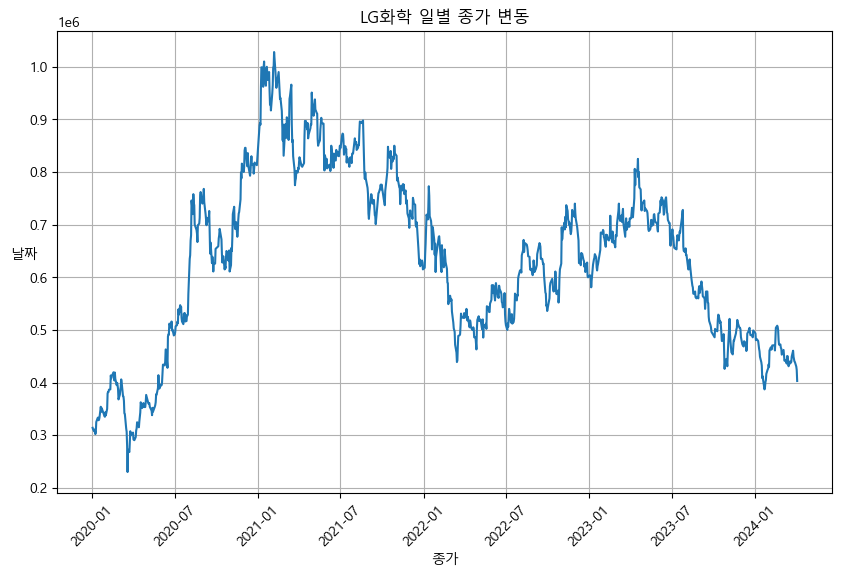

In [373]:
plt.figure(figsize=(10,6))
plt.plot(lg_stock_info['basDt'],lg_stock_info['clpr'])
plt.title('LG화학 일별 종가 변동')
plt.xlabel('종가')
plt.ylabel('날짜',rotation='horizontal')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()